In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

features = pd.read_csv("data/combinedData.csv")

features = features.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
features.head()

,player,class,season,pos,school_name,conf_abbr,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
0,Stephen Curry,JR,2008-09,G,Davidson,Southern,34.0,1145.0,312,687,182,351,130,336,220,251,21.0,130.0,151,189,86,8,126.0,81.0,974,NaN,NaN,NaN,NaN,0.604,0.549,NaN,NaN,6.9,40.2,NaN,0.6,13.5,38.3,NaN,NaN,6.4,3.6,9.9,NaN,2009,1,7,1
1,J.J. Redick,SR,2005-06,G,Duke,ACC,36.0,1336.0,302,643,163,313,139,330,221,256,7.0,64.0,71,95,52,2,90.0,54.0,964,NaN,NaN,NaN,NaN,0.630,0.578,NaN,NaN,3.1,15.8,NaN,0.1,10.5,31.5,NaN,NaN,6.7,1.0,7.8,NaN,2006,1,11,0
2,Justin Wright-Foreman,SR,2018-19,G,Hofstra,CAA,35.0,1321.0,330,646,220,387,110,259,178,206,12.0,129.0,141,102,30,7,91.0,67.0,948,28.9,7.0,-3.7,3.2,0.637,0.596,1.2,11.5,6.6,17.4,1.3,0.6,10.9,33.0,123.8,108.7,6.3,1.0,7.4,844.0,2019,2,53,0
3,Doug McDermott,SR,2013-14,F,Creighton,Big East,35.0,1181.0,330,627,234,413,96,214,178,206,57.0,187.0,244,55,8,5,62.0,67.0,934,32.8,9.8,-1.6,8.2,0.644,0.603,6.4,17.8,12.6,11.5,0.4,0.5,7.9,36.2,127.4,106.0,6.3,1.4,7.7,788.0,2014,1,11,0
4,Stephen Curry,SO,2007-08,G,Davidson,Southern,36.0,1193.0,317,656,155,287,162,369,135,151,28.0,137.0,165,104,73,14,93.0,85.0,931,NaN,NaN,NaN,NaN,0.640,0.607,NaN,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,7.0,3.3,10.3,NaN,2009,1,7,1


In [75]:
features.describe()

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,855.000000,743.000000,743.000000,743.000000,1537.000000,1537.000000,855.000000,855.000000,1339.000000,1339.000000,855.00000,1339.000000,1537.000000,1339.000000,855.000000,855.000000,1537.000000,1537.000000,1537.000000,855.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,32.715029,923.905010,148.290176,308.607027,115.977228,220.934288,32.312947,87.672739,91.301236,124.964216,52.164606,125.005856,177.170462,71.150293,33.904359,25.411191,63.160052,72.256994,420.194535,21.157661,4.011171,3.144145,7.154778,0.566571,0.531889,6.634152,15.796257,11.359149,14.715907,2.09193,2.789022,15.210670,23.093876,113.431579,97.387135,2.361223,1.823422,4.185231,414.461988,2011.523748,1.546519,32.145738,0.047495
std,5.154462,276.627857,61.284209,127.608411,54.633689,98.062030,30.024388,75.467658,48.704743,62.068852,32.159204,57.870978,83.929206,53.276672,18.652750,25.505567,26.116409,21.195203,178.031377,5.378865,2.900817,2.374883,3.520548,0.052379,0.057562,4.050177,5.631031,4.422831,8.616445,0.93558,2.801309,4.181573,4.644153,10.382418,6.122345,1.421851,0.919556,1.944911,169.916099,4.525491,0.497993,16.720344,0.212765
min,3.000000,24.000000,1.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-1.700000,-10.500000,-3.700000,-6.900000,0.250000,0.200000,0.300000,5.600000,3.000000,0.000000,0.00000,0.000000,4.800000,8.300000,54.200000,77.700000,-0.700000,0.000000,-0.100000,2.000000,2003.000000,1.000000,1.000000,0.000000
25%,31.000000,785.000000,107.000000,224.000000,76.000000,149.000000,4.000000,15.000000,54.000000,79.000000,25.000000,84.000000,115.000000,33.000000,20.000000,7.000000,45.000000,60.000000,298.000000,17.800000,2.150000,1.600000,4.900000,0.536000,0.496000,3.100000,11.500000,7.600000,8.500000,1.50000,0.800000,12.400000,19.900000,108.000000,93.450000,1.300000,1.200000,2.900000,306.000000,2008.000000,1.000000,19.000000,0.000000
50%,34.000000,989.000000,153.000000,315.000000,115.000000,223.000000,26.000000,76.000000,87.000000,120.000000,47.000000,118.000000,164.000000,58.000000,31.000000,17.000000,64.000000,73.000000,433.000000,21.200000,4.100000,2.900000,7.400000,0.567000,0.531000,6.000000,14.800000,11.000000,12.700000,1.90000,1.800000,14.700000,22.900000,114.100000,97.900000,2.300000,1.700000,4.200000,425.000000,2011.000000,2.000000,33.000000,0.000000
75%,36.000000,1120.000000,190.000000,400.000000,153.000000,286.000000,52.000000,144.000000,123.000000,165.000000,74.000000,159.000000,227.000000,95.000000,45.000000,34.000000,79.000000,87.000000,543.000000,24.700000,5.850000,4.500000,9.400000,0.599000,0.567000,9.700000,19.600000,14.700000,19.400000,2.55000,3.800000,17.500000,26.200000,120.000000,101.600000,3.300000,2.300000,5.500000,535.500000,2015.000000,2.000000,46.000000,0.000000
max,40.000000,1474.000000,330.000000,703.000000,297.000000,615.000000,162.000000,380.000000,249.000000,336.000000,197.000000,369.000000,504.000000,331.000000,126.000000,186.000000,170.000000,138.000000,974.000000,40.800000,12.800000,11.700000,20.000000,0.740000,0.728000,23.100000,35.600000,25.700000,53.300000,8.00000,18.800000,40.700000,39.300000,144.700000,118.700000,7.000000,6.700000,11.300000,947.000000,2019.000000,2.000000,60.000000,1.000000


In [76]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 49 columns):
player          1537 non-null object
class           1536 non-null object
season          1537 non-null object
pos             1537 non-null object
school_name     1537 non-null object
conf_abbr       1537 non-null object
g               1537 non-null float64
mp              1537 non-null float64
fg              1537 non-null int64
fga             1537 non-null int64
fg2             1537 non-null int64
fg2a            1537 non-null int64
fg3             1537 non-null int64
fg3a            1537 non-null int64
ft              1537 non-null int64
fta             1537 non-null int64
orb             1537 non-null float64
drb             1537 non-null float64
trb             1537 non-null int64
ast             1537 non-null int64
stl             1537 non-null int64
blk             1537 non-null int64
tov             1537 non-null float64
pf              1537 non-null float64
pts        

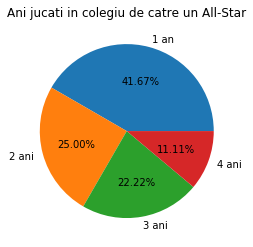

In [77]:
allStars = features[features["allStar"] == 1]
allStars = allStars.groupby(["year_drafted", "round", "pick_overall"])["player"].count()
allStars = allStars.value_counts()
plt.pie(allStars, labels=["1 an", "2 ani", "3 ani", "4 ani"], autopct='%1.2f%%')
plt.title("Ani jucati in colegiu de catre un All-Star")
plt.show()

In [78]:
# features = features.dropna()
features = features.fillna(features.median())
features.head()

,player,class,season,pos,school_name,conf_abbr,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
0,Stephen Curry,JR,2008-09,G,Davidson,Southern,34.0,1145.0,312,687,182,351,130,336,220,251,21.0,130.0,151,189,86,8,126.0,81.0,974,21.2,4.1,2.9,7.4,0.604,0.549,6.0,14.8,6.9,40.2,1.9,0.6,13.5,38.3,114.1,97.9,6.4,3.6,9.9,425.0,2009,1,7,1
1,J.J. Redick,SR,2005-06,G,Duke,ACC,36.0,1336.0,302,643,163,313,139,330,221,256,7.0,64.0,71,95,52,2,90.0,54.0,964,21.2,4.1,2.9,7.4,0.630,0.578,6.0,14.8,3.1,15.8,1.9,0.1,10.5,31.5,114.1,97.9,6.7,1.0,7.8,425.0,2006,1,11,0
2,Justin Wright-Foreman,SR,2018-19,G,Hofstra,CAA,35.0,1321.0,330,646,220,387,110,259,178,206,12.0,129.0,141,102,30,7,91.0,67.0,948,28.9,7.0,-3.7,3.2,0.637,0.596,1.2,11.5,6.6,17.4,1.3,0.6,10.9,33.0,123.8,108.7,6.3,1.0,7.4,844.0,2019,2,53,0
3,Doug McDermott,SR,2013-14,F,Creighton,Big East,35.0,1181.0,330,627,234,413,96,214,178,206,57.0,187.0,244,55,8,5,62.0,67.0,934,32.8,9.8,-1.6,8.2,0.644,0.603,6.4,17.8,12.6,11.5,0.4,0.5,7.9,36.2,127.4,106.0,6.3,1.4,7.7,788.0,2014,1,11,0
4,Stephen Curry,SO,2007-08,G,Davidson,Southern,36.0,1193.0,317,656,155,287,162,369,135,151,28.0,137.0,165,104,73,14,93.0,85.0,931,21.2,4.1,2.9,7.4,0.640,0.607,6.0,14.8,11.0,12.7,1.9,1.8,11.3,22.9,114.1,97.9,7.0,3.3,10.3,425.0,2009,1,7,1


In [79]:
import random

allStars = features[features["allStar"] == 1]
theRest = features[features["allStar"] == 0]
theRest = theRest.sample(n=200, random_state=1)
features = pd.concat([allStars, theRest])
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 64
Data columns (total 49 columns):
player          273 non-null object
class           273 non-null object
season          273 non-null object
pos             273 non-null object
school_name     273 non-null object
conf_abbr       273 non-null object
g               273 non-null float64
mp              273 non-null float64
fg              273 non-null int64
fga             273 non-null int64
fg2             273 non-null int64
fg2a            273 non-null int64
fg3             273 non-null int64
fg3a            273 non-null int64
ft              273 non-null int64
fta             273 non-null int64
orb             273 non-null float64
drb             273 non-null float64
trb             273 non-null int64
ast             273 non-null int64
stl             273 non-null int64
blk             273 non-null int64
tov             273 non-null float64
pf              273 non-null float64
pts             273 non-null int64
per

In [41]:
features.describe()

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.00000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,32.876672,936.898960,150.884101,313.120357,118.031204,224.239227,32.852897,88.881129,94.560178,129.095097,54.163447,129.121842,183.28529,73.726597,35.028232,25.747400,64.777117,73.638930,429.181278,21.394502,4.200743,3.035661,7.456018,0.569749,0.534061,6.442348,15.413224,11.479792,14.873403,2.018574,2.562110,15.207578,23.156018,114.202526,97.542051,2.439970,1.888707,4.328678,423.742942,2011.142645,1.524517,30.728083,0.108470
std,4.891800,256.921336,58.927429,120.975163,54.209118,94.599473,30.132654,75.451444,48.249627,61.559301,33.190647,59.733411,87.04430,52.484999,17.966672,26.164687,25.569541,20.763237,171.941547,3.847504,1.793312,1.629949,2.330210,0.051555,0.056582,3.054949,4.320703,4.290300,8.034429,0.694641,2.520518,4.098092,4.324050,6.927141,4.536479,1.397039,0.949839,1.956414,114.505423,4.544801,0.499770,17.119904,0.311204
min,4.000000,28.000000,3.000000,6.000000,3.000000,6.000000,0.000000,0.000000,3.000000,3.000000,1.000000,5.000000,7.00000,0.000000,1.000000,0.000000,1.000000,1.000000,11.000000,6.400000,-5.600000,-3.500000,-4.200000,0.367000,0.316000,0.600000,5.800000,3.200000,0.000000,0.400000,0.000000,5.800000,11.500000,71.500000,77.700000,-0.700000,0.000000,0.000000,18.000000,2003.000000,1.000000,1.000000,0.000000
25%,31.000000,810.000000,110.000000,232.000000,79.000000,156.000000,4.000000,17.000000,59.000000,84.000000,27.000000,87.000000,120.00000,38.000000,21.000000,8.000000,46.000000,61.000000,305.000000,21.100000,4.100000,2.900000,7.400000,0.537000,0.499000,5.700000,14.700000,8.200000,9.600000,1.900000,0.900000,12.500000,20.600000,114.100000,97.600000,1.400000,1.200000,3.000000,425.000000,2007.000000,1.000000,16.000000,0.000000
50%,33.000000,999.000000,155.000000,318.000000,115.000000,221.000000,28.000000,77.000000,89.000000,124.000000,50.000000,120.000000,170.00000,61.000000,32.000000,18.000000,65.000000,75.000000,437.000000,21.200000,4.100000,2.900000,7.400000,0.570000,0.530000,6.000000,14.800000,11.000000,12.700000,1.900000,1.800000,14.700000,22.900000,114.100000,97.900000,2.300000,1.800000,4.300000,425.000000,2011.000000,2.000000,32.000000,0.000000
75%,36.000000,1118.000000,190.000000,394.000000,154.000000,286.000000,53.000000,146.000000,126.000000,170.000000,77.000000,164.000000,235.00000,96.000000,45.000000,34.000000,80.000000,87.000000,552.000000,21.500000,4.100000,2.900000,7.400000,0.603000,0.570000,6.500000,15.100000,14.500000,18.800000,1.900000,3.300000,17.300000,25.900000,115.500000,98.100000,3.400000,2.400000,5.600000,431.000000,2015.000000,2.000000,45.000000,0.000000
max,40.000000,1436.000000,317.000000,687.000000,297.000000,509.000000,162.000000,369.000000,249.000000,331.000000,197.000000,369.000000,504.00000,324.000000,97.000000,186.000000,167.000000,138.000000,974.000000,40.800000,12.800000,11.700000,20.000000,0.728000,0.725000,19.800000,35.600000,25.400000,50.000000,8.000000,18.800000,40.700000,39.300000,139.000000,118.700000,7.000000,6.700000,11.300000,947.000000,2019.000000,2.000000,60.000000,1.000000


In [81]:
# create per_game stats and drop the normal stats
features["pts_pg"] = features["pts"] / features["g"]
features["fg_p"] = features["fg"] / features["fga"]
features["fg2_p"] = features["fg2"] / features["fg2a"]
features["fg3_p"] = features["fg3"] / ( features["fg3a"]  +.000000001)
features["ft_p"] = features["ft"] / (features["fta"] + +.000000001)
features["trb_p"] = features["trb"] / features["g"]
features["ast_p"] = features["ast"] / features["g"]
features["stl_p"] = features["stl"] / features["g"]
features["blk_p"] = features["blk"] / features["g"]

# features = features.drop(columns=list_normal_stats)

In [82]:
mean_statistics = features.groupby(["allStar"]).mean()
mean_statistics.head(40)

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,pts_pg,fg_p,fg2_p,fg3_p,ft_p,trb_p,ast_p,stl_p,blk_p
allStar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,32.615000,918.795000,146.280000,305.185000,114.515000,220.010000,31.765000,85.175000,89.730000,122.560000,52.620000,126.180000,178.800000,69.180000,31.130000,24.210000,62.610000,71.970000,414.055000,21.160000,4.182500,2.909000,7.287500,0.566095,0.529775,6.165500,15.166500,11.341500,14.65450,2.002500,2.414500,15.111000,23.080500,114.253500,97.854500,2.328500,1.776500,4.105000,420.660000,2011.855000,1.600000,33.790000,12.589024,0.481208,0.513669,0.302831,0.723333,5.461314,2.104210,0.958201,0.743125
1,33.027397,965.260274,169.178082,334.931507,138.712329,254.068493,30.465753,80.863014,114.205479,156.136986,66.493151,156.630137,223.123288,86.986301,42.767123,33.986301,73.643836,78.465753,483.027397,22.726027,4.565753,3.241096,8.136986,0.589521,0.553808,6.563014,16.031507,12.980822,17.89726,2.164384,2.728767,15.812329,24.347945,114.953425,96.415068,3.083562,2.567123,5.646575,443.082192,2008.287671,1.109589,11.561644,14.597018,0.514707,0.544277,0.292954,0.721872,6.626119,2.630329,1.290684,0.993383


In [83]:
def plotGroupBarPlot(data, feature_list):
    df = data.loc[feature_list]
    df.plot(kind="bar")
    plt.show()

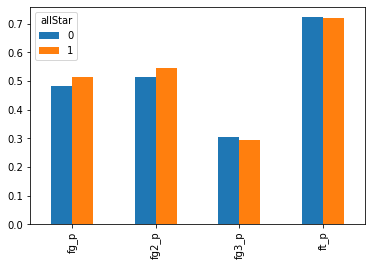

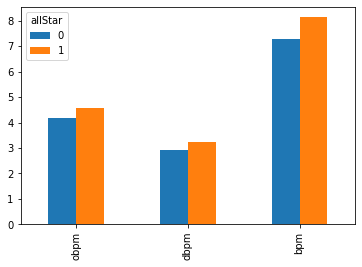

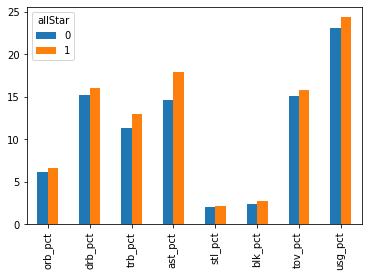

In [84]:
plotGroupBarPlot(mean_statistics.T, ["fg_p", "fg2_p", "fg3_p", "ft_p"])
plotGroupBarPlot(mean_statistics.T, ["obpm", "dbpm", "bpm"])
plotGroupBarPlot(mean_statistics.T, ["orb_pct", "drb_pct", "trb_pct", "ast_pct",
                                     "stl_pct", "blk_pct", "tov_pct", "usg_pct"])

In [85]:
features.to_csv("dataMeanCompleted.csv")

In [86]:
test = features.groupby(["year_drafted", "round", "pick_overall", "player", "school_name"], as_index=False).mean()
test.to_csv("dataMeanPerCollege.csv")

In [87]:
from sklearn.metrics import classification_report as scor
from sklearn.metrics import roc_curve, auc, roc_auc_score

def rocCurve(test_labels, predictions):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions)
    auc = roc_auc_score(test_labels, predictions)
    print('AUC: %.3f' % auc)
    ns_probs = [0 for _ in range(len(test_labels))]
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(test_labels, predictions)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    

def evaluate(model, test_features, test_labels, treshold):
#     print("Test labels",test_labels)
    predictions = model.predict(test_features)
#     print("Predictions",predictions)
    print(scor(test_labels, np.where(predictions > treshold, 1, 0),
                target_names = ["NOT All-Star", "All-Star"]))
    rocCurve(test_labels, predictions)

In [88]:
def printFeatureImportance(rf, feature_list):
    importances = list(rf.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return feature_importances

In [89]:
def getTrainTest(features):
    np_labels = np.array(features["allStar"])
    temp_features = features.drop(columns=["allStar"])
    feature_list = list(features.columns)
    np_features = np.array(temp_features)
    train_features, test_features, train_labels, test_labels = train_test_split(np_features, 
                                                                                np_labels,
                                                                                test_size = 0.25,
                                                                                random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def randomForest_train_variableImportane(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list
    

In [91]:
features.columns

Index(['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'per', 'obpm',
       'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct', 'trb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg',
       'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'year_drafted', 'round',
       'pick_overall', 'allStar', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p',
       'trb_p', 'ast_p', 'stl_p', 'blk_p'],
      dtype='object')

In [92]:
list_meta_data = ['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr']
list_numeric_features = ['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod',
       'round', 'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p']
fetures_select_all = list_numeric_features + ["allStar"]

In [93]:
rf_base, test_features_base, test_labels_base, feature_list_base = randomForest_train_variableImportane(features[fetures_select_all])

              precision    recall  f1-score   support

NOT All-Star       0.82      0.92      0.87        50
    All-Star       0.69      0.47      0.56        19

    accuracy                           0.80        69
   macro avg       0.76      0.70      0.72        69
weighted avg       0.79      0.80      0.78        69

AUC: 0.697


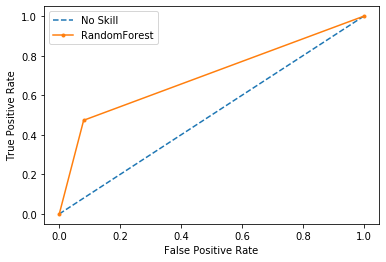

Variable: pick_overall         Importance: 0.2
Variable: dws                  Importance: 0.06
Variable: stl_p                Importance: 0.06
Variable: ws                   Importance: 0.05
Variable: round                Importance: 0.05
Variable: ast_pct              Importance: 0.04
Variable: fg2_p                Importance: 0.04
Variable: ast_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: ows                  Importance: 0.03
Variable: pts_pg               Importance: 0.03
Variable: fg_p                 Importance: 0.03
Variable: ft_p                 Importance: 0.03
Variable: trb_p                Importance: 0.03
Variable: blk_p                Importance: 0.03
Variable: per                  Importance: 0.02
Variable: stl_pct              Importance: 0.02
Variable: blk_pct              Importance

In [94]:
treshold = 0.5
evaluate(rf_base, test_features_base, test_labels_base, treshold)
feature_importans = printFeatureImportance(rf_base, feature_list_base)

In [95]:
# we take the firs 10 most important features
list_selected_features = [x[0] for x in feature_importans[:10]]
list_selected_features.append("allStar")

In [96]:
rf_top, test_features_top, test_labels_top, feature_list_top = randomForest_train_variableImportane(features[list_selected_features])

              precision    recall  f1-score   support

NOT All-Star       0.85      0.88      0.86        50
    All-Star       0.65      0.58      0.61        19

    accuracy                           0.80        69
   macro avg       0.75      0.73      0.74        69
weighted avg       0.79      0.80      0.79        69

AUC: 0.729


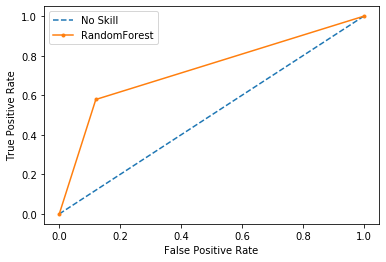

Variable: pick_overall         Importance: 0.29
Variable: dws                  Importance: 0.12
Variable: stl_p                Importance: 0.1
Variable: fg2_p                Importance: 0.09
Variable: ws                   Importance: 0.08
Variable: round                Importance: 0.07
Variable: ast_pct              Importance: 0.06
Variable: ast_p                Importance: 0.06
Variable: ts_pct               Importance: 0.06
Variable: efg_pct              Importance: 0.06


[('pick_overall', 0.29),
 ('dws', 0.12),
 ('stl_p', 0.1),
 ('fg2_p', 0.09),
 ('ws', 0.08),
 ('round', 0.07),
 ('ast_pct', 0.06),
 ('ast_p', 0.06),
 ('ts_pct', 0.06),
 ('efg_pct', 0.06)]

In [97]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)
printFeatureImportance(rf_top, feature_list_top)

In [98]:
from sklearn.ensemble import RandomForestClassifier

def randomForestWeight(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    weight = "balanced"
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42, class_weight=weight)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list

In [99]:
rf_weight_top, test_features_weight_top , test_labels_weight_top, feature_list_weight_top = randomForestWeight(features[list_selected_features])

              precision    recall  f1-score   support

NOT All-Star       0.85      0.88      0.86        50
    All-Star       0.65      0.58      0.61        19

    accuracy                           0.80        69
   macro avg       0.75      0.73      0.74        69
weighted avg       0.79      0.80      0.79        69

AUC: 0.729


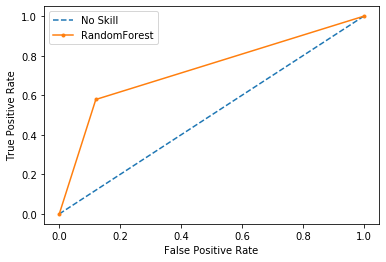

Variable: pick_overall         Importance: 0.3
Variable: dws                  Importance: 0.12
Variable: round                Importance: 0.1
Variable: fg2_p                Importance: 0.1
Variable: stl_p                Importance: 0.09
Variable: ws                   Importance: 0.07
Variable: ast_pct              Importance: 0.06
Variable: efg_pct              Importance: 0.06
Variable: ast_p                Importance: 0.05
Variable: ts_pct               Importance: 0.05


[('pick_overall', 0.3),
 ('dws', 0.12),
 ('round', 0.1),
 ('fg2_p', 0.1),
 ('stl_p', 0.09),
 ('ws', 0.07),
 ('ast_pct', 0.06),
 ('efg_pct', 0.06),
 ('ast_p', 0.05),
 ('ts_pct', 0.05)]

In [100]:
treshold = 0.5
evaluate(rf_weight_top, test_features_weight_top, test_labels_weight_top, treshold)
printFeatureImportance(rf_weight_top, feature_list_weight_top)

In [101]:
rf_weight_base, test_features_weight_base, test_labels_weight_base, feature_list_weight_base = randomForestWeight(features[fetures_select_all])

              precision    recall  f1-score   support

NOT All-Star       0.82      0.94      0.88        50
    All-Star       0.75      0.47      0.58        19

    accuracy                           0.81        69
   macro avg       0.79      0.71      0.73        69
weighted avg       0.80      0.81      0.80        69

AUC: 0.707


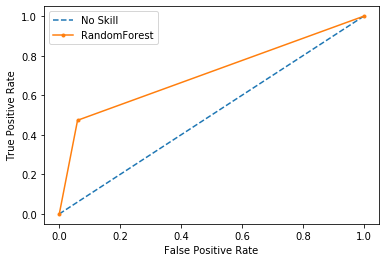

Variable: pick_overall         Importance: 0.2
Variable: round                Importance: 0.08
Variable: dws                  Importance: 0.06
Variable: fg2_p                Importance: 0.05
Variable: stl_p                Importance: 0.05
Variable: tov_pct              Importance: 0.04
Variable: ws                   Importance: 0.04
Variable: fg_p                 Importance: 0.04
Variable: per                  Importance: 0.03
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: ft_p                 Importance: 0.03
Variable: trb_p                Importance: 0.03
Variable: ast_p                Importance: 0.03
Variable: blk_p                Importance: 0.03
Variable: drb_pct              Importance: 0.02
Variable: trb_pct              Importance: 0.02
Variable: stl_pct              Importance: 0.02
Variable: ows                  Importance: 0.02
Variable: pts_pg               Importance

[('pick_overall', 0.2),
 ('round', 0.08),
 ('dws', 0.06),
 ('fg2_p', 0.05),
 ('stl_p', 0.05),
 ('tov_pct', 0.04),
 ('ws', 0.04),
 ('fg_p', 0.04),
 ('per', 0.03),
 ('ts_pct', 0.03),
 ('efg_pct', 0.03),
 ('ast_pct', 0.03),
 ('ft_p', 0.03),
 ('trb_p', 0.03),
 ('ast_p', 0.03),
 ('blk_p', 0.03),
 ('drb_pct', 0.02),
 ('trb_pct', 0.02),
 ('stl_pct', 0.02),
 ('ows', 0.02),
 ('pts_pg', 0.02),
 ('fg3_p', 0.02),
 ('obpm', 0.01),
 ('dbpm', 0.01),
 ('bpm', 0.01),
 ('orb_pct', 0.01),
 ('blk_pct', 0.01),
 ('usg_pct', 0.01),
 ('off_rtg', 0.01),
 ('def_rtg', 0.01),
 ('pprod', 0.01)]

In [102]:
treshold = 0.5
evaluate(rf_weight_base, test_features_weight_base, test_labels_weight_base, treshold)
printFeatureImportance(rf_weight_base, feature_list_weight_base)

# Chestii avansate pe care le-am inteles*

In [103]:

train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features[fetures_select_all])

In [104]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' :  [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)],
    'max_features' : [20, 30, "log2", "sqrt", None],
    'max_depth': [int(x) for x in range(2,22,2)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}


# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = 8, verbose = 2)


In [105]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed: 11.3min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 13.9min
[Parallel(n_jobs=8)]: Done 4885 tasks      | elapsed: 16.8min
[Parallel(n_jobs=8)]: Done 5816 tasks      | elapsed: 19.9min
[Parallel(n_jobs=8)]: Done 6000 out of 6000 | elapsed: 20.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [106]:
best= grid_search.best_estimator_
best

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=233, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

              precision    recall  f1-score   support

NOT All-Star       0.87      0.82      0.85        50
    All-Star       0.59      0.68      0.63        19

    accuracy                           0.78        69
   macro avg       0.73      0.75      0.74        69
weighted avg       0.79      0.78      0.79        69

AUC: 0.752


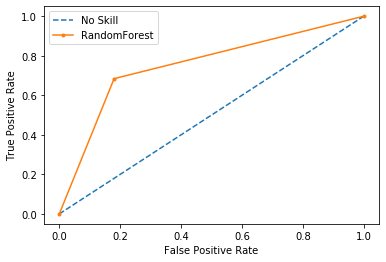

Variable: pick_overall         Importance: 0.24
Variable: round                Importance: 0.13
Variable: dws                  Importance: 0.07
Variable: per                  Importance: 0.05
Variable: ws                   Importance: 0.05
Variable: stl_p                Importance: 0.05
Variable: stl_pct              Importance: 0.04
Variable: fg2_p                Importance: 0.04
Variable: drb_pct              Importance: 0.03
Variable: fg_p                 Importance: 0.03
Variable: obpm                 Importance: 0.02
Variable: bpm                  Importance: 0.02
Variable: ts_pct               Importance: 0.02
Variable: efg_pct              Importance: 0.02
Variable: ast_pct              Importance: 0.02
Variable: tov_pct              Importance: 0.02
Variable: ast_p                Importance: 0.02
Variable: blk_p                Importance: 0.02
Variable: dbpm                 Importance: 0.01
Variable: orb_pct              Importance: 0.01
Variable: trb_pct              Importanc

In [107]:
evaluate(grid_search.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search.best_estimator_, feature_list)

In [110]:
from sklearn.model_selection import GridSearchCV
max_futures = [None] + [int(x) for x in range(25,32,1)]
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' :  [int(x) for x in np.linspace(start = 150, stop = 250, num = 10)],
    'max_features' : [20, 30, "log2", "sqrt", None],
    'max_depth': [int(x) for x in range(5,16,1)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}


# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_new = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = 8, verbose = 2)

# Fit the grid search to the data
grid_search_new.fit(train_features, train_labels)

Fitting 3 folds for each of 2200 candidates, totalling 6600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   34.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  8.9min
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed: 11.2min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 14.0min
[Parallel(n_jobs=8)]: Done 4885 tasks      | elapsed: 17.2min
[Parallel(n_jobs=8)]: Done 5816 tasks      | elapsed: 20.7min
[Parallel(n_jobs=8)]: Done 6600 out of 6600 | elapsed: 23.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

              precision    recall  f1-score   support

NOT All-Star       0.86      0.88      0.87        50
    All-Star       0.67      0.63      0.65        19

    accuracy                           0.81        69
   macro avg       0.76      0.76      0.76        69
weighted avg       0.81      0.81      0.81        69

AUC: 0.756


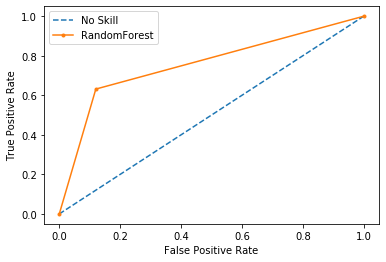

Variable: pick_overall         Importance: 0.24
Variable: round                Importance: 0.11
Variable: dws                  Importance: 0.05
Variable: ws                   Importance: 0.05
Variable: stl_p                Importance: 0.05
Variable: per                  Importance: 0.04
Variable: fg2_p                Importance: 0.04
Variable: efg_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: stl_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: fg_p                 Importance: 0.03
Variable: blk_p                Importance: 0.03
Variable: obpm                 Importance: 0.02
Variable: bpm                  Importance: 0.02
Variable: ts_pct               Importance: 0.02
Variable: drb_pct              Importance: 0.02
Variable: trb_pct              Importance: 0.02
Variable: pts_pg               Importance: 0.02
Variable: ft_p                 Importance: 0.02
Variable: trb_p                Importanc

In [111]:
evaluate(grid_search_new.best_estimator_, test_features, test_labels, treshold)
feature_importans = printFeatureImportance(grid_search_new.best_estimator_, feature_list)

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
fetures_name = features[fetures_select_all].drop(columns="allStar").columns
export_graphviz(best.estimators_[13], out_file='tree.dot', 
                feature_names = fetures_name,
                class_names = ["All-Star", "NOT All-Star"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
features[fetures_select_all].drop(columns="allStar").columns